# Generating random data for leaning

In [1]:
import numpy as np
import random

data_train = [random.randint(1, 100) for _ in range(10000)]

len(data_train)

10000

In [2]:
data_train = np.array(data_train)

data_train = data_train.reshape(-1, 10)

data_train.shape

(1000, 10)

In [3]:
data_train[0]

array([ 4, 29, 58, 27, 28, 57, 35, 11, 74, 81])

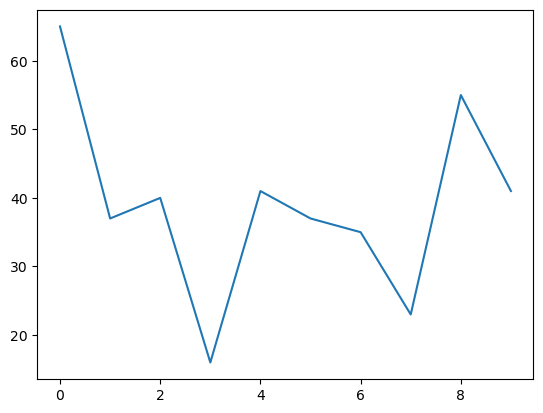

In [4]:
import matplotlib.pyplot as plt


plt.plot(data_train[1])
plt.show()

# Generating random data for Testing

In [5]:
data_test_normal = [random.randint(1, 100) for _ in range(100)]
data_test_anomaly = [random.randint(100, 200) for _ in range(100)]

data_test_normal = np.array(data_test_normal)
data_test_anomaly = np.array(data_test_anomaly)

data_test = np.concatenate((data_test_normal, data_test_anomaly))
data_test = data_test.reshape(-1, 10)

data_test.shape

(20, 10)

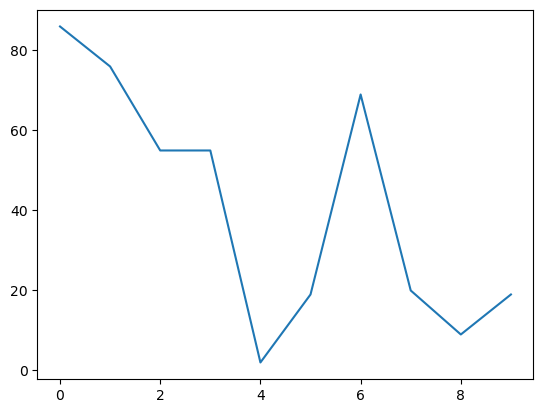

In [6]:
plt.plot(data_test[0])

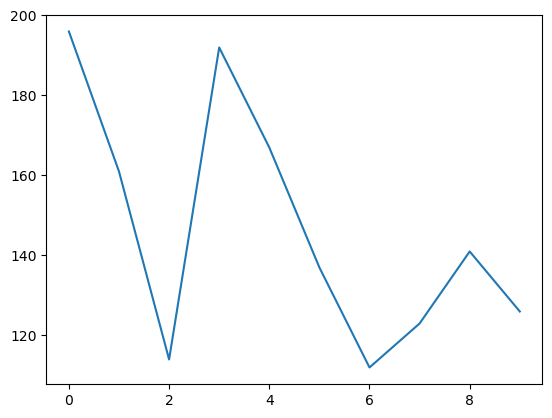

In [7]:
plt.plot(data_test[19])

# Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

data_train.shape, data_test.shape

((1000, 10), (20, 10))

In [9]:
data_train = data_train.reshape(-1, 10, 1)
data_test = data_test.reshape(-1, 10, 1)

data_train.shape, data_test.shape

((1000, 10, 1), (20, 10, 1))

# Developing model

In [10]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv1DTranspose

model = Sequential()
model.add(Input(shape=(10, 1)))
model.add(Conv1D(filters=8, kernel_size=3, padding='same', strides=2, activation='relu'))
model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1DTranspose(filters=4, kernel_size=5, padding='same', strides=2, activation='relu'))
model.add(Conv1DTranspose(filters=1, kernel_size=5, padding='same'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 8)              32        
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 4)              100       
                                                                 
 conv1d_transpose (Conv1DTra  (None, 10, 4)            84        
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 10, 1)            21        
 ranspose)                                                       
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mae', optimizer='adam')

history = model.fit(x=data_train, y=data_train, epochs=100, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.8459 - val_loss: 0.8294
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8078 - val_loss: 0.7805
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7493 - val_loss: 0.7167
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6846 - val_loss: 0.6600
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6256 - val_loss: 0.6023
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5629 - val_loss: 0.5247
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4755 - val_loss: 0.4276
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3910 - val_loss: 0.3593
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3316 - val_loss: 0.3083
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2845 - val_loss: 0.2682
Epoch 11/

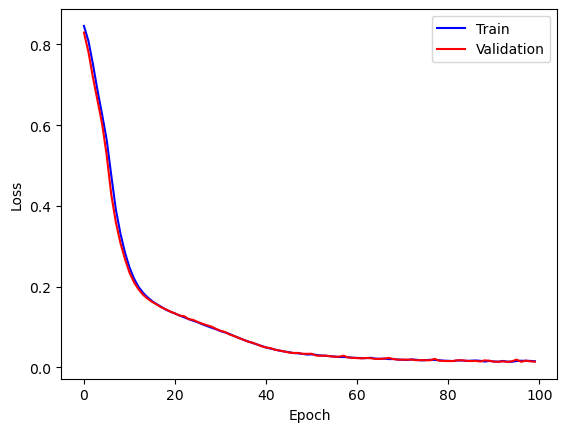

In [12]:
plt.plot(history.history['loss'], color='blue', label='Train')
plt.plot(history.history['val_loss'], color='red', label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Get threshold

In [13]:
yhat_train = model.predict(data_train)

mae_train = np.mean(np.abs(yhat_train - data_train), axis=1)

mae_train.shape

32/32 [==============================] - 0s 773us/step


(1000, 1)

In [14]:
threshold = max(mae_train)

threshold

array([0.05949887])

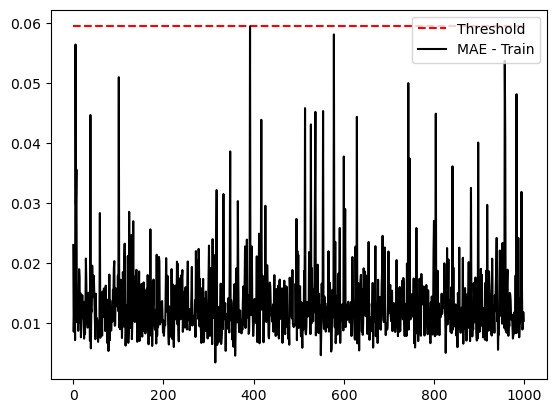

In [15]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_train), color='red', linestyles='--', label='Threshold')
plt.plot(mae_train, color='black', label='MAE - Train')
plt.legend()
plt.show()

# Visualize the result

In [16]:
yhat_test = model.predict(data_test)

mae_test = np.mean(np.abs(yhat_test - data_test), axis=1)

mae_test.shape

1/1 [==============================] - 0s 18ms/step


(20, 1)

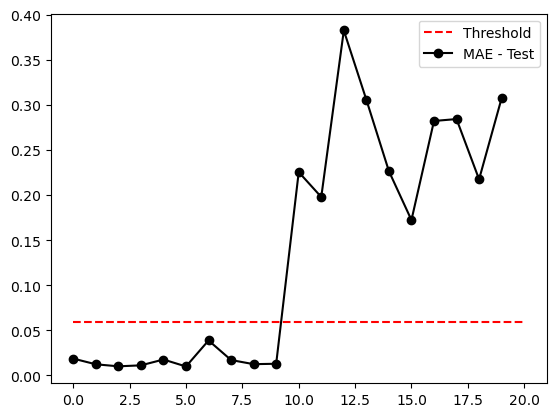

In [17]:
plt.hlines(y=threshold, xmin=0, xmax=len(mae_test), color='red', linestyles='--', label='Threshold')
plt.plot(mae_test, color='black', label='MAE - Test', marker='o')
plt.legend()
plt.show()